#**NETWORK INTRUSION DETECTION SYSTEM**

In [2]:
#Import Libraries
import pandas as pd
pd.set_option('display.width', 10000)  # Width of the display in characters
pd.set_option('display.max_rows', 100)  # Maximum number of rows to display
pd.set_option('display.max_columns', 100)  # Maximum number of columns to display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics # Importing 'metrics' from sklearn
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical
from sklearn.ensemble import BaggingClassifier
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')



*   The code mounts Google Drive to access files and directories from within Google Colab.




In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reads a CSV file containing training data from Google Drive
train = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')
#Displays the first few rows of the DataFrame.
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [5]:
# Replacing '-' with NaN in column 'Service'
train['service'] = train['service'].replace('-', pd.NA)

# Calculating the mode value of column 'Service' (ignoring NaN values)
mode_value = train['service'].mode(dropna=True)[0]

# Replacing NaN with the mode value in column 'Service'
train['service'] = train['service'].fillna(mode_value)

In [6]:
# Drops the 'id' and 'label' columns from the DataFrame 'train'
train.drop(columns=["id","label"], inplace=True)

In [7]:
# Displaying the first 5 rows after replacing nans with mode value in service column
train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,dns,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,dns,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,dns,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,dns,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal


In [8]:
# Reads a CSV file containing training data from Google Drive
test = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')
# Displays the first few rows of the DataFrame
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [9]:
# Replacing '-' with NaN in column 'Service'
test['service'] = test['service'].replace('-', pd.NA)

# Calculating the mode value of column 'Service' (ignoring NaN values)
mode_value_test = test['service'].mode(dropna=True)[0]

# Replacing NaN with the mode value in column 'Service'
test['service'] = test['service'].fillna(mode_value_test)

In [10]:
# Drops the 'id' and 'label' columns from the DataFrame 'test'
test.drop(columns=["id","label"], inplace=True)

In [11]:
# Displaying the first 5 rows after replacing nans with mode value in service column
test.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.000011,udp,dns,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal
1,0.000008,udp,dns,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal
2,0.000005,udp,dns,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal
3,0.000006,udp,dns,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal
4,0.000010,udp,dns,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal


In [12]:
l = ['Analysis','Backdoor','Shellcode','Worms']
for i in l:
    #data[data.name.isin(list2) == False]
    train = train[train.attack_cat.isin(l) == False]
    test = test[test.attack_cat.isin(l) == False]

In [13]:
# Here attack_cat column is the target variable
y_train = train['attack_cat']
y_test  = test['attack_cat']

In [14]:
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
# Initialize LabelEncoder
le = LabelEncoder()

# Encode each categorical column
for column in categorical_columns:
    train[column] = le.fit_transform(train[column])
    test[column] = le.fit_transform(test[column])

In [15]:
# Encoding the target labels using label encoder
y_train_encoded = le.fit_transform(y_train)
y_test_encoded  = le.fit_transform(y_test)

In [16]:
# Check the mapping of numerical values to classes
class_mapping = {index: label for index, label in enumerate(le.classes_)}
print("Class Mapping:", class_mapping)

Class Mapping: {0: 'DoS', 1: 'Exploits', 2: 'Fuzzers', 3: 'Generic', 4: 'Normal', 5: 'Reconnaissance'}


#### Dropping highly correlated features from the train data.

In [17]:
# Calculating the correlation matrix
corr_matrix = train.corr(numeric_only=True).abs()

# Creating a mask to identify highly correlated features
upper_triangle_mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Identifying highly correlated features
highly_correlated_features = (corr_matrix * upper_triangle_mask).stack()
highly_correlated_features = highly_correlated_features[highly_correlated_features > 0.9]  # Setting correlation threshold here

# Removing one feature from each highly correlated pair
features_to_drop = set()
for pair in highly_correlated_features.index:
    features_to_drop.add(pair[1])  # Dropping the second feature in each pair

# Dropping highly correlated features from the train dataset
train_filtered = train.drop(columns=features_to_drop)

# Dropping highly correlated features from the test dataset
test_filtered = test.drop(columns=features_to_drop)

# Printing the names of features removed
print("Removed highly correlated features:", features_to_drop)

Removed highly correlated features: {'sloss', 'ct_dst_sport_ltm', 'ct_ftp_cmd', 'ct_dst_src_ltm', 'ct_src_ltm', 'dwin', 'synack', 'dbytes', 'ackdat', 'sbytes', 'ct_src_dport_ltm', 'is_sm_ips_ports', 'ct_srv_dst', 'dloss'}


In [18]:
train_filtered.head()

,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,tcprtt,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,is_ftp_login,ct_flw_http_mthd,attack_cat
0,0.121478,113,1,2,6,4,74.087490,252,254,14158.942380,8495.365234,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,0.000000,43,43,0,0,1,0,1,0,0,4
1,0.649902,113,1,2,14,38,78.473372,62,252,8395.112305,503571.312500,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,0.000000,52,1106,0,0,43,1,1,0,0,4
2,1.623129,113,1,2,8,16,14.170161,62,252,1572.271851,60929.230470,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,0.111897,46,824,0,0,7,1,2,0,0,4
3,1.681642,113,2,2,12,12,13.677108,62,252,2740.178955,3358.622070,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,0.000000,52,64,0,0,1,1,2,1,0,4
4,0.449454,113,1,2,10,6,33.373826,254,252,8561.499023,3987.059814,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,0.128381,53,45,0,0,43,1,2,0,0,4


In [19]:
test_filtered.head()

,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,tcprtt,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,is_ftp_login,ct_flw_http_mthd,attack_cat
0,0.000011,117,1,4,2,0,90909.0902,254,0,180363632.0,0.0,0.011,0.0,0.0,0.0,0,0,0,0.0,248,0,0,0,2,2,1,0,0,4
1,0.000008,117,1,4,2,0,125000.0003,254,0,881000000.0,0.0,0.008,0.0,0.0,0.0,0,0,0,0.0,881,0,0,0,2,2,1,0,0,4
2,0.000005,117,1,4,2,0,200000.0051,254,0,854400000.0,0.0,0.005,0.0,0.0,0.0,0,0,0,0.0,534,0,0,0,3,2,1,0,0,4
3,0.000006,117,1,4,2,0,166666.6608,254,0,600000000.0,0.0,0.006,0.0,0.0,0.0,0,0,0,0.0,450,0,0,0,3,2,2,0,0,4
4,0.000010,117,1,4,2,0,100000.0025,254,0,850400000.0,0.0,0.010,0.0,0.0,0.0,0,0,0,0.0,1063,0,0,0,3,2,2,0,0,4


In [20]:
#Train
X_train = train_filtered.drop(columns=['attack_cat'])
y_train = y_train_encoded

#Test
X_test = test_filtered.drop(columns=['attack_cat'])
y_test = y_test_encoded

#Traditional Learning Methods

#Logistic Regression

*   In our traditional learning methods, first we are planning to go with Logistic regression which is the oldest classification algorithm

In [ ]:
# Initialize LogisticRegression
logreg = LogisticRegression(penalty = 'none', max_iter = 10000) # Instantiating llogistic regression

# Fit the model
logreg.fit(X_train, y_train)

#predict on train data
y_pred_train = logreg.predict(X_train)

# Predict on test data
y_pred_test = logreg.predict(X_test)

# Print classification report for train data
print("Training Classification Report")
print(classification_report(y_train, y_pred_train))

# Print classification report for test data
print("Testing Classification Report")
print(classification_report(y_test, y_pred_test))

Training Classification Report
              precision    recall  f1-score   support

           0       0.24      0.00      0.00     12264
           1       0.37      0.72      0.49     33393
           2       0.46      0.16      0.24     18184
           3       0.82      0.98      0.89     40000
           4       0.79      0.72      0.75     56000
           5       0.00      0.00      0.00     10491

    accuracy                           0.63    170332
   macro avg       0.45      0.43      0.40    170332
weighted avg       0.59      0.63      0.58    170332

Testing Classification Report
              precision    recall  f1-score   support

           0       0.35      0.00      0.00      4089
           1       0.24      0.69      0.35     11132
           2       0.24      0.14      0.18      6062
           3       0.78      0.96      0.86     18871
           4       0.81      0.47      0.59     37000
           5       0.00      0.00      0.00      3496

    accuracy    



*   We could see that,for this logistic regression model there is no variance, but there is bias.
*   since our problem is multi classification problem, our focus is not only on accuracy because as we know accuracy is a metric that is defined for the classification altogether but it is not defined for
classes individually.
*  and also  in dealing with unbalanced classification problems, a accuracy alone does not mean anything, that's why we have other metrics like precision, recall, and f1-score that are defined for each class of the classification problem.
*   Even though, all four of them work together to evaluate
the performance of a classifier, our main focus is on F1-score because F1-
score is the harmonic mean of the precision and recall for each class and also  Achieving a high F1-score requires both high precision and high recall.
*    Model is performing good for classes 1, 3, and 4 which are majority classes compared to minority classes 0, 2, and 5.
*   To address this class imbalance, we tried below methods:
    1.   Class Weighting
    2.   Resampling Techniques
    3.   Ensemble Methods


#Balanced Logistic Regression or Logistic Regression with Class Weighting

In [ ]:
# Initialize LogisticRegression with balanced class weights
logreg = LogisticRegression(penalty='none', max_iter=10000, class_weight='balanced')

# Fit the model
logreg.fit(X_train, y_train)

#predict on train data
y_pred_train = logreg.predict(X_train)

# Predict on test data
y_pred_test = logreg.predict(X_test)

# Print classification report for train data
print("Training Classification Report")
print(classification_report(y_train, y_pred_train))

# Print classification report for test data
print("Testing Classification Report")
print(classification_report(y_test, y_pred_test))

Training Classification Report
              precision    recall  f1-score   support

           0       0.32      0.69      0.44     12264
           1       0.33      0.13      0.19     33393
           2       0.28      0.78      0.41     18184
           3       0.89      0.98      0.93     40000
           4       0.91      0.59      0.71     56000
           5       0.00      0.00      0.00     10491

    accuracy                           0.58    170332
   macro avg       0.45      0.53      0.45    170332
weighted avg       0.63      0.58      0.57    170332

Testing Classification Report
              precision    recall  f1-score   support

           0       0.30      0.61      0.40      4089
           1       0.32      0.17      0.22     11132
           2       0.15      0.71      0.24      6062
           3       0.83      0.96      0.89     18871
           4       0.91      0.37      0.53     37000
           5       0.00      0.00      0.00      3496

    accuracy    

By balanced class weighting, we can penalize misclassifications of the minority classes more heavily than the majority classes. By giving higher weights to minority classes, we can encourage the model to pay more attention to these classes during training. In here, we could see there is slight improvement in F1-score for minority classes 0 and 2. But for class 5 there is no impact.

#Logistic Regression with SMOTE(Synthetic Minority Over-sampling Technique)

*   SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to address class imbalance in machine learning datasets. It works by generating synthetic samples for the minority class to balance the class distribution.



In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on the resampled data
logistic_reg_smote = LogisticRegression()
logistic_reg_smote.fit(X_resampled, y_resampled)

# Evaluate the model
y_train_pred_sm = logistic_reg_smote.predict(X_train)
y_test_pred_sm = logistic_reg_smote.predict(X_test)

print("Training Classification Report after SMOTE:")
print(classification_report(y_train, y_train_pred_sm))

print("Training Confusion Matrix after SMOTE:")
print(confusion_matrix(y_train, y_train_pred_sm))

print("Testing Classification Report after SMOTE:")
print(classification_report(y_test, y_test_pred_sm ))

print("Testing Confusion Matrix after SMOTE:")
print(confusion_matrix(y_test, y_test_pred_sm))

Training Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.12      0.74      0.21     12264
           1       0.00      0.00      0.00     33393
           2       0.19      0.57      0.29     18184
           3       0.01      0.00      0.00     40000
           4       0.81      0.60      0.69     56000
           5       0.00      0.00      0.00     10491

    accuracy                           0.31    170332
   macro avg       0.19      0.32      0.20    170332
weighted avg       0.30      0.31      0.27    170332

Training Confusion Matrix after SMOTE:
[[ 9103     0  2427    88   646     0]
 [12116     0 16633   180  4464     0]
 [ 5880     0 10417    20  1867     0]
 [39464     0   386     3   147     0]
 [ 3365     0 19125    14 33496     0]
 [ 5186     0  4459    27   819     0]]
Testing Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.08      0.68      0.



*   After applying SMOTE technique, we could see except class 4, results of remaining all the classes have been very low




#Logistic Regression with Grid search



*   By identifying the best combination of hyperparameters, GridSearchCV helps to maximize model performance. This can lead to better predictive accuracy, higher precision, improved recall, or other performance metrics. We want to give a try for grid search by imposing penalities and see how we will get the results.



In [ ]:
# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.003, 0.005, 0.009],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}

In [ ]:
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=3000),
             param_grid={'C': [0.001, 0.003, 0.005, 0.009],
                         'penalty': ['l1', 'l2']})

In [ ]:
# Retrain the model with the best hyperparameters
best_log_reg_model = grid_search.best_estimator_
best_log_reg_model.fit(X_train, y_train)

# Make predictions
y_train_pred_cv = best_log_reg_model.predict(X_train)
y_test_pred_cv = best_log_reg_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Training Classification Report after Hyperparameter Optimization:")
print(classification_report(y_train, y_train_pred_cv))

print("Training Confusion Matrix after Hyperparameter Optimization:")
print(confusion_matrix(y_train, y_train_pred_cv))

print("Testing Classification Report after Hyperparameter Optimization:")
print(classification_report(y_test, y_test_pred_cv))

print("Testing Confusion Matrix after Hyperparameter Optimization:")
print(confusion_matrix(y_test, y_test_pred_cv))

Training Classification Report after Hyperparameter Optimization:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12264
           1       0.37      0.72      0.49     33393
           2       0.46      0.16      0.23     18184
           3       0.82      0.98      0.89     40000
           4       0.79      0.72      0.75     56000
           5       0.00      0.00      0.00     10491

    accuracy                           0.63    170332
   macro avg       0.41      0.43      0.39    170332
weighted avg       0.57      0.63      0.58    170332

Training Confusion Matrix after Hyperparameter Optimization:
[[    0 10070   334   468  1392     0]
 [    0 23948   659   736  8050     0]
 [    2 12511  2857  1992   822     0]
 [    0   499    96 39139   266     0]
 [    0 11655  2142  1649 40554     0]
 [    0  6397    64  3676   354     0]]
Testing Classification Report after Hyperparameter Optimization:
              precision    rec



*   Grid Search has given me the same results that we have got for our base logistic regression model.




*  After performing Logistic regression with all these possibilities, We want to conclude that Logist regression model is not a good fit for our problem.


#Decision Tree Classifier



*   A decision tree is a hierarchical tree-like structure where each node represents a feature, each branch represents a decision based on that feature, and each leaf node represents the outcome




In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_train_pred_dt = dt_classifier.predict(X_train)
y_test_pred_dt = dt_classifier.predict(X_test)

In [ ]:
print("Classification Report for Decision Tree on Train Data:\n", classification_report(y_train, y_train_pred_dt))
print("\nClassification Report for Decision Tree on Test Data:\n", classification_report(y_test, y_test_pred_dt))

Classification Report for Decision Tree on Train Data:
               precision    recall  f1-score   support

           0       0.57      0.46      0.51     12264
           1       0.77      0.91      0.83     33393
           2       0.96      0.91      0.93     18184
           3       1.00      0.99      1.00     40000
           4       1.00      0.99      0.99     56000
           5       1.00      0.82      0.90     10491

    accuracy                           0.92    170332
   macro avg       0.88      0.85      0.86    170332
weighted avg       0.92      0.92      0.92    170332


Classification Report for Decision Tree on Test Data:
               precision    recall  f1-score   support

           0       0.30      0.36      0.33      4089
           1       0.62      0.69      0.65     11132
           2       0.28      0.52      0.36      6062
           3       0.98      0.97      0.97     18871
           4       0.92      0.74      0.82     37000
           5       0



*   We could see, we are getting better scores for all the classes for decision tree classifier model.
*   Drawbacks of decision trees is that they typically
suffer from high variance. As we can see above, there is a huge difference between accuracies of train and test data. To address this issue, we will try to implement pruning techniques such as setting constraints on the depth of the tree or the minimum samples split and Minimum Samples Leaf.

#Decision tree classifier with pruning techniques such as setting constraints on the depth of the tree or the minimum samples split and Minimum Samples Leaf to reduce variance

->**max_depth**: This parameter controls the maximum depth of the decision tree. The depth of a tree corresponds to the length of the longest path from the root node to a leaf node. Setting max_depth limits the depth of the tree, which helps prevent overfitting.

->**min_samples_split**: This parameter specifies the minimum number of samples required to split an internal node. If a node has fewer samples than min_samples_split, it will not be split, and it will become a leaf node. Setting a higher value for min_samples_split can help prevent the tree from splitting too early, which can lead to overfitting.

->**min_samples_leaf**: This parameter sets the minimum number of samples required to be at a leaf node. If a split results in a leaf node containing fewer samples than min_samples_leaf, the split is not considered valid, and the node will not be further split. Setting a higher value for min_samples_leaf can help prevent overfitting by requiring each leaf node to have a minimum number of samples.

->**random_state**: This parameter controls the randomness of the estimator. By setting a specific value for random_state, you ensure that the results are reproducible across multiple runs. If you use the same random_state value in different runs, you'll get the same results.

In [ ]:
# Initialize DecisionTreeClassifier with combined parameters to reduce variance
dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=42)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Predict on training and test data
y_train_pred_dt = dt_classifier.predict(X_train)
y_test_pred_dt = dt_classifier.predict(X_test)

print("Classification Report for Decision Tree on Train Data:\n", classification_report(y_train, y_train_pred_dt))
print("\nClassification Report for Decision Tree on Test Data:\n", classification_report(y_test, y_test_pred_dt))

Classification Report for Decision Tree on Train Data:
               precision    recall  f1-score   support

           0       0.59      0.05      0.08     12264
           1       0.64      0.92      0.76     33393
           2       0.65      0.62      0.63     18184
           3       1.00      0.97      0.98     40000
           4       0.90      0.91      0.90     56000
           5       0.89      0.75      0.81     10491

    accuracy                           0.82    170332
   macro avg       0.78      0.70      0.70    170332
weighted avg       0.82      0.82      0.80    170332


Classification Report for Decision Tree on Test Data:
               precision    recall  f1-score   support

           0       0.13      0.07      0.09      4089
           1       0.57      0.86      0.68     11132
           2       0.28      0.52      0.36      6062
           3       1.00      0.74      0.85     18871
           4       0.81      0.72      0.76     37000
           5       0



*   After implementing this pruning techniques, we are able to reduce variance slightly, but scores of minority class 0 has decreased.

#Decision Tree Classifier with Grid Search

In [ ]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20],
    'min_samples_split': [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20],
    'ccp_alpha': [0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
# Retrain the model with the best hyperparameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)

# Make predictions
y_train_pred_cv = best_dt_model.predict(X_train)
y_test_pred_cv = best_dt_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Training Classification Report after Hyperparameter Optimization:")
print(classification_report(y_train, y_train_pred_cv))

print("Training Confusion Matrix after Hyperparameter Optimization:")
print(confusion_matrix(y_train, y_train_pred_cv))

print("Testing Classification Report after Hyperparameter Optimization:")
print(classification_report(y_test, y_test_pred_cv))

print("Testing Confusion Matrix after Hyperparameter Optimization:")
print(confusion_matrix(y_test, y_test_pred_cv))

Training Classification Report after Hyperparameter Optimization:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12264
           1       0.53      0.89      0.67     33393
           2       0.30      0.49      0.37     18184
           3       1.00      0.91      0.95     40000
           4       0.95      0.82      0.88     56000
           5       0.00      0.00      0.00     10491

    accuracy                           0.71    170332
   macro avg       0.46      0.52      0.48    170332
weighted avg       0.68      0.71      0.68    170332

Training Confusion Matrix after Hyperparameter Optimization:
[[    0 11101   939     0   224     0]
 [    0 29798  2610     3   982     0]
 [    0  8411  8891     3   879     0]
 [    0   757  2666 36545    32     0]
 [    0  3891  6348     5 45756     0]
 [    0  2148  8270     0    73     0]]
Testing Classification Report after Hyperparameter Optimization:
              precision    recall  f1-score   support

           0       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

* After performing decision tree with grid search, we could see it is performing good for all the classes, except the minority classes 0 and 5.



*   After performing decision tree classifier, based on the results we want to conclude it by saying that Decision tree classifier is the best fit for our problem. Here, we didn't faced the challenge of increasing metrics scores for classes, but we have faced the challenge of addressing variance.


#Ensemble Learning Methods
##Ensemble methods like Random Forest or Gradient Boosting can handle class imbalance better than single Decision Trees by aggregating the predictions of multiple trees and also help in reducing overfitting by aggregating the predictions of multiple trees

Random Forest Classifier

In [23]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



Model accuracy score : 0.7897


Classification Report on Train Data

In [21]:
y_pred_train = clf.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.62      0.39      0.48     12264
           1       0.75      0.94      0.83     33393
           2       0.96      0.91      0.93     18184
           3       1.00      0.99      1.00     40000
           4       1.00      0.99      0.99     56000
           5       0.99      0.82      0.90     10491

    accuracy                           0.92    170332
   macro avg       0.89      0.84      0.86    170332
weighted avg       0.92      0.92      0.91    170332



Classification Report on Test Data

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.19      0.28      4089
           1       0.63      0.86      0.73     11132
           2       0.29      0.57      0.39      6062
           3       1.00      0.97      0.98     18871
           4       0.94      0.78      0.85     37000
           5       0.92      0.79      0.85      3496

    accuracy                           0.79     80650
   macro avg       0.71      0.69      0.68     80650
weighted avg       0.84      0.79      0.80     80650



*Based on the above classification report, there is some what reduction in the variance, but still there is notable difference in performance between the test and train data, suggesting potential overfitting to the train data, as indicated by the higher performance metrics on the train data compared to the test data. To address this, we have tried following parameters.

# Random Forest code with regularization and feature sampling to reduce variance

->**n_estimators**: This parameter determines the number of decision trees in the random forest. Each tree in the forest is trained on a random subset of the training data. Increasing the number of estimators generally improves the performance of the random forest, up to a certain point, by reducing overfitting and increasing the model's ability to generalize.

->**max_features**: This parameter determines the maximum number of features to consider when looking for the best split in each decision tree. It can be set to different values such as 'sqrt' (square root of the total number of features)

In [29]:
# Initialize RandomForestClassifier with regularization and feature sampling
clf = RandomForestClassifier(n_estimators=100,
                             max_depth=10,
                             min_samples_split=5,
                             min_samples_leaf=2,
                             max_features='sqrt',
                             random_state=0)

# Fit the model
clf.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.02      0.03     12264
           1       0.64      0.95      0.76     33393
           2       0.64      0.79      0.71     18184
           3       1.00      0.98      0.99     40000
           4       0.96      0.87      0.91     56000
           5       0.90      0.67      0.77     10491

    accuracy                           0.83    170332
   macro avg       0.85      0.71      0.70    170332
weighted avg       0.87      0.83      0.81    170332

              precision    recall  f1-score   support

           0       0.76      0.01      0.03      4089
           1       0.59      0.93      0.72     11132
           2       0.28      0.63      0.38      6062
           3       1.00      0.96      0.98     18871
           4       0.96      0.72      0.82     37000
           5       0.80      0.73      0.76      3496

    accuracy                           0.76     80650
   macro avg       0.73

In [25]:
# RandomForestClassifier with Grid Search
param_grid = {
    'max_depth': [100,200,300],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [100, 200, 300],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [27]:
# Retrain the model with the best hyperparameters
best_clf_model = grid_search.best_estimator_
best_clf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_cv = best_clf_model.predict(X_train)
y_test_pred_cv = best_clf_model.predict(X_test)

In [28]:
# Evaluate the model
print("Training Classification Report after Hyperparameter Optimization:")
print(classification_report(y_train, y_train_pred_cv))

print("Training Confusion Matrix after Hyperparameter Optimization:")
print(confusion_matrix(y_train, y_train_pred_cv))

print("Testing Classification Report after Hyperparameter Optimization:")
print(classification_report(y_test, y_test_pred_cv))

print("Testing Confusion Matrix after Hyperparameter Optimization:")
print(confusion_matrix(y_test, y_test_pred_cv))

Training Classification Report after Hyperparameter Optimization:
              precision    recall  f1-score   support

           0       0.56      0.23      0.32     12264
           1       0.71      0.93      0.80     33393
           2       0.86      0.87      0.87     18184
           3       1.00      0.98      0.99     40000
           4       0.98      0.96      0.97     56000
           5       0.97      0.80      0.88     10491

    accuracy                           0.89    170332
   macro avg       0.85      0.80      0.81    170332
weighted avg       0.89      0.89      0.88    170332

Training Confusion Matrix after Hyperparameter Optimization:
[[ 2793  9130   188     5    77    71]
 [ 1536 31173   380     1   196   107]
 [  230  1372 15890     4   651    37]
 [  154   472    84 39265    21     4]
 [    8   200  1985     1 53759    47]
 [  310  1759    17     1    11  8393]]
Testing Classification Report after Hyperparameter Optimization:
              precision    rec



*   After adding the regularization and feature sampling hyper parameters, we could there is significant reduction in variance. Here also just like decision trees, metric scores of class 0 has decreased while we are trying to reduce variance.


#Gradient Boosting Classifier

In [ ]:
# Gradient Boosting
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_train_pred_gb = gb_classifier.predict(X_train)
y_test_pred_gb = gb_classifier.predict(X_test)

In [ ]:
# Classification report for Gradient Boosting
print("Classification Report for Gradient Boosting on Train Data:\n", classification_report(y_train, y_train_pred_gb))
print("\nClassification Report for Gradient Boosting on Test Data:\n", classification_report(y_test, y_test_pred_gb))

Classification Report for Gradient Boosting on Train Data:
               precision    recall  f1-score   support

           0       0.76      0.02      0.04     12264
           1       0.64      0.93      0.76     33393
           2       0.68      0.72      0.70     18184
           3       1.00      0.98      0.99     40000
           4       0.93      0.90      0.92     56000
           5       0.90      0.76      0.82     10491

    accuracy                           0.83    170332
   macro avg       0.82      0.72      0.70    170332
weighted avg       0.85      0.83      0.81    170332


Classification Report for Gradient Boosting on Test Data:
               precision    recall  f1-score   support

           0       0.36      0.06      0.10      4089
           1       0.46      0.93      0.62     11132
           2       0.30      0.55      0.39      6062
           3       1.00      0.96      0.98     18871
           4       0.97      0.67      0.79     37000
           5

* We could see, Gradient boosting is also performing good for all the classes except class 0.

#Xtreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Fit grid search to the training data
xgb_classifier.fit(X_train, y_train)

y_train_pred_xgb = xgb_classifier.predict(X_train)
y_test_pred_xgb = xgb_classifier.predict(X_test)

In [ ]:
# Evaluate the model
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred_xgb))

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_xgb))

# Evaluate the model
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))

print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_xgb))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.11      0.20     12264
           1       0.68      0.95      0.79     33393
           2       0.78      0.79      0.79     18184
           3       1.00      0.99      0.99     40000
           4       0.95      0.93      0.94     56000
           5       0.95      0.78      0.86     10491

    accuracy                           0.87    170332
   macro avg       0.85      0.76      0.76    170332
weighted avg       0.88      0.87      0.85    170332

Training Confusion Matrix:
[[ 1395 10566   163     5    85    50]
 [  340 31881   502    21   318   331]
 [   45  1605 14412     9  2084    29]
 [    9   434    67 39473    15     2]
 [    8   287  3323     1 52342    39]
 [   74  2190    13     1     4  8209]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.17      0.24      4089
           1       0.62



*   We could see by implementing XGradientBoosting Classifier, there is improvement in performance metrics compared to gradient boosting.

#Bagging Classifier

Since decision trees suffer from high variance quite often, the bagging method is consistently applied to trees. As we know bagging, that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process. Here we are applying bagging for our base models like decision trees and random forests individually.

In [ ]:
# Constructing a bagged-tree classifier
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50, random_state=3)
bag_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=3)

In [ ]:
 # Finding the predictions of the bagged-tree classifier for train and test␣subsets
train_y_pred = bag_clf.predict(X_train)
test_y_pred = bag_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train␣accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test␣accuracy
train_report = classification_report(y_train, train_y_pred) # Generate␣classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate␣classification report for test data
print('Bagged Trees Classifier Train Classification Report: \n\n',train_report,'\n\n')
print('Bagged Trees Classifier Test Classification Report: \n\n', test_report)

Bagged Trees Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.61      0.39      0.48     12264
           1       0.75      0.94      0.83     33393
           2       0.96      0.91      0.93     18184
           3       1.00      0.99      1.00     40000
           4       1.00      0.99      0.99     56000
           5       0.99      0.82      0.90     10491

    accuracy                           0.92    170332
   macro avg       0.89      0.84      0.86    170332
weighted avg       0.92      0.92      0.91    170332
 


Bagged Trees Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.42      0.26      0.32      4089
           1       0.64      0.82      0.72     11132
           2       0.29      0.57      0.38      6062
           3       1.00      0.97      0.98     18871
           4       0.94      0.77      0.85     37000
           5      

In [ ]:
bag_clf = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=18, random_state=3)
bag_clf.fit(X_train, y_train)
# Finding the predictions of the bagged-tree classifier for train and test␣subsets
train_y_pred = bag_clf.predict(X_train)
test_y_pred = bag_clf.predict(X_test)
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train␣accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test␣accuracy
train_report = classification_report(y_train, train_y_pred) # Generate␣classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate␣classification report for test data
print('Bagged Trees Classifier Train Classification Report: \n\n',train_report,'\n\n')
print('Bagged Trees Classifier Test Classification Report: \n\n', test_report)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Trees Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.59      0.35      0.44     12264
           1       0.74      0.93      0.83     33393
           2       0.94      0.90      0.92     18184
           3       1.00      0.99      0.99     40000
           4       0.99      0.98      0.99     56000
           5       0.99      0.82      0.90     10491

    accuracy                           0.91    170332
   macro avg       0.87      0.83      0.84    170332
weighted avg       0.91      0.91      0.90    170332
 


Bagged Trees Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.44      0.17      0.25      4089
           1       0.63      0.86      0.73     11132
           2       0.29      0.58      0.39      6062
           3       1.00      0.97      0.98     18871
           4       0.94      0.78      0.85     37000
           5      

The bagging method employs an averaging mechanism to reduce the variance and increase the accuracy of the test subset in a statistical learning method.
When the weak learners are decision tress, the individual trees are constructed deep. Therefore,each individual tree has high variance, but low bias. Averaging the B trees reduces the variance. Bagging will mainly focus at getting an ensemble model with less variance than its components


Stacking

The idea of stacking is to learn several different weak learners and combine them by training a meta-model to output predictions based on the multiple predictions returned by these weak models. So, we need to define two things in order to build our stacking model: the L learners we want to fit and the meta-model that combines them.

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define base models
estimators = [
    ('decision_tree', dt_classifier),
    ('gradient_boosting', gb_classifier),
    ('xtreme_gradient_boosting', xgb_classifier)
]

# Define meta-model
meta_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Create StackingClassifier with base models and meta-model
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=meta_model)

# Train StackingClassifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on training data
y_train_pred_stack = stacking_classifier.predict(X_train)

# Make predictions on test data
y_test_pred_stack = stacking_classifier.predict(X_test)

In [ ]:
estimators = [('decision_tree', dt_classifier),
              ('random_forest', clf),
              ('gradient_boosting', gb_classifier)]
stacking_classifier = StackingClassifier(estimators=estimators)
stacking_classifier.fit(X_train, y_train)
y_train_pred_stack = stacking_classifier.predict(X_train)
y_test_pred_stack = stacking_classifier.predict(X_test)

In [ ]:
# Classification report for Stacking Classifier
print("Classification Report for Stacking Classifier on Train Data:\n", classification_report(y_train, y_train_pred_stack))
print("\nClassification Report for Stacking Classifier on Test Data:\n", classification_report(y_test, y_test_pred_stack))

Classification Report for Stacking Classifier on Train Data:
               precision    recall  f1-score   support

           0       0.92      0.01      0.01     12264
           1       0.67      0.99      0.80     33393
           2       0.81      0.79      0.80     18184
           3       1.00      0.98      0.99     40000
           4       0.96      0.94      0.95     56000
           5       0.96      0.79      0.86     10491

    accuracy                           0.87    170332
   macro avg       0.89      0.75      0.74    170332
weighted avg       0.89      0.87      0.84    170332


Classification Report for Stacking Classifier on Test Data:
               precision    recall  f1-score   support

           0       0.33      0.01      0.02      4089
           1       0.60      0.91      0.72     11132
           2       0.26      0.69      0.38      6062
           3       1.00      0.96      0.98     18871
           4       0.96      0.69      0.80     37000
        

* the Stacking Classifier demonstrates reasonably strong performance on both the training and test data, with relatively consistent performance across different classes. However, there is a slight drop in performance when transitioning from the training to the test data, suggesting some degree of overfitting.

In [ ]:
!pip install tensorflow-addons==0.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.7 MB/s eta 0:00:00


Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, AdamW
import tensorflow_addons as tfa
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


#Fully Connected Neural Networks

In [ ]:
# Build the neural network model
model_FNN = models.Sequential()
model_FNN.add(layers.Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)))
model_FNN.add(layers.Dropout(0.2))  # Add dropout regularization
model_FNN.add(layers.Dense(64, activation='sigmoid'))
model_FNN.add(layers.Dropout(0.2))  # Add dropout regularization
model_FNN.add(layers.Dense(64, activation='sigmoid'))
model_FNN.add(layers.Dropout(0.2))  # Add dropout regularization
model_FNN.add(layers.Dense(6, activation='softmax'))  # Change num_classes to the number of classes in your target variable

# Compile the model
model_FNN.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', 'categorical_accuracy'])

# Train the model
history = model_FNN.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2654/2662 [============================>.] - ETA: 0s - loss: 1.3054 - accuracy: 0.5312 - categorical_accuracy: 7.0648e-05

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2662/2662 [==============================] - 9s 3ms/step - loss: 1.3051 - accuracy: 0.5313 - categorical_accuracy: 7.0451e-05 - val_loss: 1.2171 - val_accuracy: 0.6298 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
2662/2662 [==============================] - 10s 4ms/step - loss: 1.2588 - accuracy: 0.5422 - categorical_accuracy: 4.1096e-05 - val_loss: 1.2068 - val_accuracy: 0.6302 - val_categorical_accuracy: 0.0000e+00
Epoch 3/100
2662/2662 [==============================] - 13s 5ms/step - loss: 1.2554 - accuracy: 0.5452 - categorical_accuracy: 0.0000e+00 - val_loss: 1.2043 - val_accuracy: 0.6299 - val_categorical_accuracy: 0.0000e+00
Epoch 4/100
2662/2662 [==============================] - 9s 3ms/step - loss: 1.2523 - accuracy: 0.5451 - categorical_accuracy: 0.0000e+00 - val_loss: 1.2039 - val_accuracy: 0.6301 - val_categorical_accuracy: 0.0000e+00
Epoch 5/100
2662/2662 [==============================] - 10s 4ms/step - loss: 1.2518 - accuracy: 0.5453 - categorical_accuracy: 0.0000

In [ ]:
# Predict FNN on the train set results

y_pred_train = model_FNN.predict(X_train)
# Convert predicted probabilities to class labels
y_pred_train = np.argmax(y_pred_train, axis=1)
print(y_pred_train)

5323/5323 [==============================] - 8s 1ms/step
[4 4 1 ... 3 3 3]


In [ ]:
# Predict FNN on the test set results

y_pred_test = model_FNN.predict(X_test)
# Convert predicted probabilities to class labels
y_pred_test = np.argmax(y_pred_test, axis=1)
print(y_pred_test)

2521/2521 [==============================] - 3s 1ms/step
[3 3 3 ... 4 4 3]


In [ ]:
#classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12264
           1       0.40      0.26      0.31     33393
           2       0.00      0.00      0.00     18184
           3       0.53      0.99      0.69     40000
           4       0.65      0.86      0.74     56000
           5       0.00      0.00      0.00     10491

    accuracy                           0.56    170332
   macro avg       0.26      0.35      0.29    170332
weighted avg       0.42      0.56      0.47    170332



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#classification report for test data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4089
           1       0.27      0.28      0.28     11132
           2       0.00      0.00      0.00      6062
           3       0.57      0.97      0.72     18871
           4       0.73      0.73      0.73     37000
           5       0.00      0.00      0.00      3496

    accuracy                           0.60     80650
   macro avg       0.26      0.33      0.29     80650
weighted avg       0.51      0.60      0.54     80650



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall, the model gives a consistent but relatively low performance across both training and test data with 56% and 60% accuracy scores. The model struggles to effectively distinguish between certain classes, particularly minority classes 0, 2, and 5

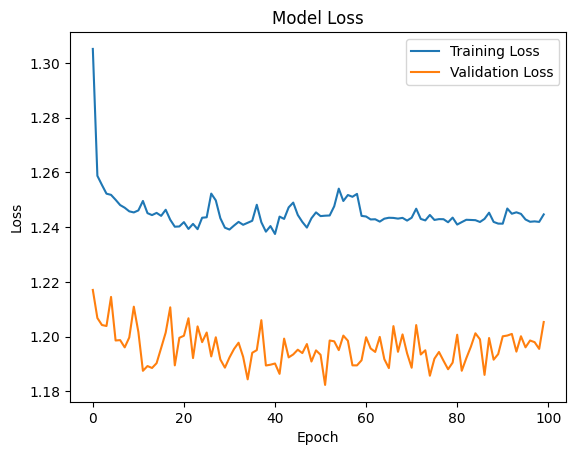

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Build the neural network model
model_FNN = models.Sequential()
model_FNN.add(layers.Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)))
model_FNN.add(layers.Dropout(0.2))  # Add dropout regularization
model_FNN.add(layers.Dense(64, activation='sigmoid'))
model_FNN.add(layers.Dropout(0.2))  # Add dropout regularization
model_FNN.add(layers.Dense(64, activation='sigmoid'))
model_FNN.add(layers.Dropout(0.2))  # Add dropout regularization
model_FNN.add(layers.Dense(6, activation='softmax'))  # Change num_classes to the number of classes in your target variable

# Compile the model
model_FNN.compile(optimizer=tf.keras.optimizers.AdamW(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', 'categorical_accuracy'])

# Train the model
history = model_FNN.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

y_pred_train = model_FNN.predict(X_train)
# Convert predicted probabilities to class labels
y_pred_train = np.argmax(y_pred_train, axis=1)

y_pred_test = model_FNN.predict(X_test)
# Convert predicted probabilities to class labels
y_pred_test = np.argmax(y_pred_test, axis=1)

#classification report for train data
print(classification_report(y_train, y_pred_train))

#classification report for test data
print(classification_report(y_test, y_pred_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2652/2662 [============================>.] - ETA: 0s - loss: 1.3062 - accuracy: 0.5293 - categorical_accuracy: 2.7691e-04

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2662/2662 [==============================] - 13s 5ms/step - loss: 1.3060 - accuracy: 0.5293 - categorical_accuracy: 2.7593e-04 - val_loss: 1.2361 - val_accuracy: 0.6289 - val_categorical_accuracy: 0.0000e+00
Epoch 2/50
2662/2662 [==============================] - 10s 4ms/step - loss: 1.2555 - accuracy: 0.5435 - categorical_accuracy: 0.0000e+00 - val_loss: 1.2100 - val_accuracy: 0.6189 - val_categorical_accuracy: 0.0000e+00
Epoch 3/50
2662/2662 [==============================] - 11s 4ms/step - loss: 1.2435 - accuracy: 0.5481 - categorical_accuracy: 0.0000e+00 - val_loss: 1.2105 - val_accuracy: 0.6125 - val_categorical_accuracy: 0.0000e+00
Epoch 4/50
2662/2662 [==============================] - 11s 4ms/step - loss: 1.2411 - accuracy: 0.5517 - categorical_accuracy: 0.0000e+00 - val_loss: 1.2047 - val_accuracy: 0.6129 - val_categorical_accuracy: 0.0000e+00
Epoch 5/50
2662/2662 [==============================] - 10s 4ms/step - loss: 1.2374 - accuracy: 0.5551 - categorical_accuracy: 1.7613e-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12264
           1       0.38      0.22      0.28     33393
           2       0.00      0.00      0.00     18184
           3       0.51      0.99      0.67     40000
           4       0.65      0.86      0.74     56000
           5       0.00      0.00      0.00     10491

    accuracy                           0.56    170332
   macro avg       0.26      0.34      0.28    170332
weighted avg       0.41      0.56      0.46    170332

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4089
           1       0.27      0.27      0.27     11132
           2       0.00      0.00      0.00      6062
           3       0.55      0.97      0.70     18871
           4       0.74      0.72      0.73     37000
           5       0.00      0.00      0.00      3496

    accuracy                           0.60     80650
   macro avg       0.26

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As you can see, after applying adamw optimizer also we could see there is no improvement

In [ ]:
# Build the neural network model
model_CNN = models.Sequential()

# Add convolutional layers
model_CNN.add(layers.Conv1D(64, 3, activation='sigmoid', input_shape=(X_train.shape[1], 1)))
model_CNN.add(layers.MaxPooling1D(2))
model_CNN.add(layers.Conv1D(64, 3, activation='sigmoid'))
model_CNN.add(layers.MaxPooling1D(2))

# Flatten the output before passing it to the dense layers
model_CNN.add(layers.Flatten())

# Add dense layers with dropout regularization
model_CNN.add(layers.Dense(64, activation='sigmoid'))
model_CNN.add(layers.Dropout(0.2))
model_CNN.add(layers.Dense(64, activation='sigmoid'))
model_CNN.add(layers.Dropout(0.2))

# Output layer
model_CNN.add(layers.Dense(6, activation='softmax'))  # Change num_classes to the number of classes in your target variable

# Compile the model
model_CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'categorical_accuracy'])
# Convert DataFrame to numpy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the input data to include a channel dimension
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Train the model
history=model_CNN.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))


Epoch 1/10
5323/5323 [==============================] - 35s 6ms/step - loss: 0.7011 - accuracy: 0.7174 - categorical_accuracy: 0.0179 - val_loss: 0.6603 - val_accuracy: 0.6889 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
5323/5323 [==============================] - 38s 7ms/step - loss: 0.5322 - accuracy: 0.7823 - categorical_accuracy: 0.0109 - val_loss: 0.6166 - val_accuracy: 0.7036 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
5323/5323 [==============================] - 33s 6ms/step - loss: 0.4973 - accuracy: 0.7951 - categorical_accuracy: 0.0081 - val_loss: 0.5673 - val_accuracy: 0.7276 - val_categorical_accuracy: 0.0068
Epoch 4/10
5323/5323 [==============================] - 33s 6ms/step - loss: 0.4778 - accuracy: 0.8005 - categorical_accuracy: 0.0071 - val_loss: 0.5708 - val_accuracy: 0.7224 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
5323/5323 [==============================] - 33s 6ms/step - loss: 0.4634 - accuracy: 0.8053 - categorical_accuracy: 0.0056 - val_loss

In [ ]:
# Predict CNN on the train set results

y_pred_train = model_CNN.predict(X_train_reshaped)
# Convert predicted probabilities to class labels
y_pred_train = np.argmax(y_pred_train, axis=1)
print(y_pred_train)

5323/5323 [==============================] - 13s 2ms/step
[1 1 1 ... 3 3 3]


In [ ]:
# Predict CNN on the test set results

y_pred_test = model_CNN.predict(X_test_reshaped)
# Convert predicted probabilities to class labels
y_pred_test = np.argmax(y_pred_test, axis=1)
print(y_pred_test)

2521/2521 [==============================] - 5s 2ms/step
[2 2 2 ... 4 4 2]


In [ ]:
#classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.40      0.00      0.01     12264
           1       0.64      0.91      0.75     33393
           2       0.61      0.73      0.67     18184
           3       1.00      0.98      0.99     40000
           4       0.94      0.88      0.91     56000
           5       0.85      0.78      0.81     10491

    accuracy                           0.82    170332
   macro avg       0.74      0.71      0.69    170332
weighted avg       0.82      0.82      0.80    170332



In [ ]:
#classification report for test data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.19      0.00      0.01      4089
           1       0.58      0.90      0.71     11132
           2       0.25      0.62      0.35      6062
           3       1.00      0.95      0.97     18871
           4       0.96      0.69      0.80     37000
           5       0.83      0.82      0.83      3496

    accuracy                           0.75     80650
   macro avg       0.63      0.67      0.61     80650
weighted avg       0.82      0.75      0.76     80650



For CNN, we could see it's treating minority classes 2, and 5 better comparitively to FNN. But there is no significant improvement for 0 class

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

AttributeError: module 'matplotlib' has no attribute 'plot'

* Overall, the model shows good performance in the majority of classes but struggles with class 0

In [ ]:
# Build the neural network model
model_CNN = models.Sequential()

# Add convolutional layers
model_CNN.add(layers.Conv1D(64, 3, activation='sigmoid', input_shape=(X_train.shape[1], 1)))
model_CNN.add(layers.MaxPooling1D(2))
model_CNN.add(layers.Conv1D(64, 3, activation='sigmoid'))
model_CNN.add(layers.MaxPooling1D(2))

# Flatten the output before passing it to the dense layers
model_CNN.add(layers.Flatten())

# Add dense layers with dropout regularization
model_CNN.add(layers.Dense(64, activation='sigmoid'))
model_CNN.add(layers.Dropout(0.2))
model_CNN.add(layers.Dense(64, activation='sigmoid'))
model_CNN.add(layers.Dropout(0.2))

# Output layer
model_CNN.add(layers.Dense(6, activation='softmax'))  # Change num_classes to the number of classes in your target variable

# Compile the model
model_CNN.compile(optimizer=tf.keras.optimizers.AdamW(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'categorical_accuracy'])
# Convert DataFrame to numpy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the input data to include a channel dimension
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Train the model
history=model_CNN.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

y_pred_train = model_CNN.predict(X_train_reshaped)
# Convert predicted probabilities to class labels
y_pred_train = np.argmax(y_pred_train, axis=1)

y_pred_test = model_CNN.predict(X_test_reshaped)
# Convert predicted probabilities to class labels
y_pred_test = np.argmax(y_pred_test, axis=1)

#classification report for train data
print(classification_report(y_train, y_pred_train))

#classification report for test data
print(classification_report(y_test, y_pred_test))


Epoch 1/50
5323/5323 [==============================] - 50s 9ms/step - loss: 0.7040 - accuracy: 0.7157 - categorical_accuracy: 0.0111 - val_loss: 0.7042 - val_accuracy: 0.6576 - val_categorical_accuracy: 0.0014
Epoch 2/50
5323/5323 [==============================] - 47s 9ms/step - loss: 0.5311 - accuracy: 0.7824 - categorical_accuracy: 0.0109 - val_loss: 0.5918 - val_accuracy: 0.7252 - val_categorical_accuracy: 0.0000e+00
Epoch 3/50
5323/5323 [==============================] - 45s 8ms/step - loss: 0.4940 - accuracy: 0.7955 - categorical_accuracy: 0.0075 - val_loss: 0.5823 - val_accuracy: 0.7204 - val_categorical_accuracy: 0.0100
Epoch 4/50
5323/5323 [==============================] - 43s 8ms/step - loss: 0.4780 - accuracy: 0.8012 - categorical_accuracy: 0.0069 - val_loss: 0.5466 - val_accuracy: 0.7557 - val_categorical_accuracy: 0.0000e+00
Epoch 5/50
5323/5323 [==============================] - 40s 8ms/step - loss: 0.4670 - accuracy: 0.8049 - categorical_accuracy: 0.0032 - val_loss: 0.

For CNN, after using Adamw optimizer we could see for minority class 0 there is improvement in precision. But there is no improvement in recall and f1-score.

#Recurrent Neural Networks

In [ ]:
# Build the neural network model
model_RNN = models.Sequential()

# Add a SimpleRNN layer
model_RNN.add(layers.SimpleRNN(64, activation='sigmoid', input_shape=(X_train.shape[1], 1), return_sequences=True))
model_RNN.add(layers.SimpleRNN(64, activation='sigmoid'))

# Add dense layers with dropout regularization
model_RNN.add(layers.Dense(64, activation='sigmoid'))
model_RNN.add(layers.Dropout(0.2))
model_RNN.add(layers.Dense(64, activation='sigmoid'))
model_RNN.add(layers.Dropout(0.2))

# Output layer
model_RNN.add(layers.Dense(6, activation='softmax'))  # Change num_classes to the number of classes in your target variable

# Compile the model
model_RNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'categorical_accuracy'])

# Convert DataFrame to numpy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the input data to include a time step dimension
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Train the model
history=model_RNN.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
5323/5323 [==============================] - 87s 16ms/step - loss: 0.9507 - accuracy: 0.6351 - categorical_accuracy: 0.0028 - val_loss: 0.8899 - val_accuracy: 0.6633 - val_categorical_accuracy: 0.0134
Epoch 2/10
5323/5323 [==============================] - 86s 16ms/step - loss: 0.6399 - accuracy: 0.7484 - categorical_accuracy: 0.0169 - val_loss: 0.6834 - val_accuracy: 0.6882 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
5323/5323 [==============================] - 95s 18ms/step - loss: 0.5815 - accuracy: 0.7657 - categorical_accuracy: 0.0072 - val_loss: 0.6352 - val_accuracy: 0.6904 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
5323/5323 [==============================] - 94s 18ms/step - loss: 0.5514 - accuracy: 0.7730 - categorical_accuracy: 0.0019 - val_loss: 0.7323 - val_accuracy: 0.6574 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
5323/5323 [==============================] - 85s 16ms/step - loss: 0.5344 - accuracy: 0.7799 - categorical_accuracy: 0.0014 - val

In [ ]:
# Predict RNN on the train set results

y_pred_train = model_RNN.predict(X_train_reshaped)
# Convert predicted probabilities to class labels
y_pred_train = np.argmax(y_pred_train, axis=1)
print(y_pred_train)

5323/5323 [==============================] - 27s 5ms/step
[1 1 1 ... 3 3 3]


In [ ]:
# Predict RNN on the test set results

y_pred_test = model_RNN.predict(X_test_reshaped)
# Convert predicted probabilities to class labels
y_pred_test = np.argmax(y_pred_test, axis=1)
print(y_pred_test)

2521/2521 [==============================] - 12s 5ms/step
[2 2 2 ... 4 4 2]


In [ ]:
#classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12264
           1       0.60      0.95      0.74     33393
           2       0.57      0.75      0.65     18184
           3       1.00      0.98      0.99     40000
           4       0.98      0.82      0.89     56000
           5       0.92      0.65      0.76     10491

    accuracy                           0.81    170332
   macro avg       0.68      0.69      0.67    170332
weighted avg       0.79      0.81      0.79    170332



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#classification report for test data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4089
           1       0.51      0.93      0.66     11132
           2       0.25      0.66      0.36      6062
           3       1.00      0.96      0.98     18871
           4       0.98      0.62      0.76     37000
           5       0.89      0.71      0.79      3496

    accuracy                           0.72     80650
   macro avg       0.61      0.65      0.59     80650
weighted avg       0.81      0.72      0.73     80650



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

* RNN model performs reasonably well on the majority of classes but struggles significantly with class 0.

In [ ]:
# Build the neural network model
model_RNN = models.Sequential()

# Add a SimpleRNN layer
model_RNN.add(layers.SimpleRNN(64, activation='sigmoid', input_shape=(X_train.shape[1], 1), return_sequences=True))
model_RNN.add(layers.SimpleRNN(64, activation='sigmoid'))

# Add dense layers with dropout regularization
model_RNN.add(layers.Dense(64, activation='sigmoid'))
model_RNN.add(layers.Dropout(0.2))
model_RNN.add(layers.Dense(64, activation='sigmoid'))
model_RNN.add(layers.Dropout(0.2))

# Output layer
model_RNN.add(layers.Dense(6, activation='softmax'))  # Change num_classes to the number of classes in your target variable

# Compile the model
model_RNN.compile(optimizer=tf.keras.optimizers.AdamW(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'categorical_accuracy'])

# Convert DataFrame to numpy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the input data to include a time step dimension
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Train the model
history=model_RNN.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Predict RNN on the train set results
y_pred_train = model_RNN.predict(X_train_reshaped)
# Convert predicted probabilities to class labels
y_pred_train = np.argmax(y_pred_train, axis=1)

# Predict RNN on the test set results
y_pred_test = model_RNN.predict(X_test_reshaped)
# Convert predicted probabilities to class labels
y_pred_test = np.argmax(y_pred_test, axis=1)

#classification report for train data
print(classification_report(y_train, y_pred_train))

#classification report for test data
print(classification_report(y_test, y_pred_test))

Epoch 1/10
5323/5323 [==============================] - 119s 21ms/step - loss: 0.9640 - accuracy: 0.6304 - categorical_accuracy: 0.0043 - val_loss: 1.0024 - val_accuracy: 0.5949 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
5323/5323 [==============================] - 113s 21ms/step - loss: 0.6424 - accuracy: 0.7504 - categorical_accuracy: 0.0078 - val_loss: 0.8450 - val_accuracy: 0.6365 - val_categorical_accuracy: 7.8115e-04
Epoch 3/10
5323/5323 [==============================] - 102s 19ms/step - loss: 0.5854 - accuracy: 0.7672 - categorical_accuracy: 0.0094 - val_loss: 0.7451 - val_accuracy: 0.6641 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
5323/5323 [==============================] - 111s 21ms/step - loss: 0.5608 - accuracy: 0.7759 - categorical_accuracy: 0.0024 - val_loss: 0.7330 - val_accuracy: 0.6594 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
5323/5323 [==============================] - 125s 24ms/step - loss: 0.5429 - accuracy: 0.7824 - categorical_accuracy: 0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12264
           1       0.63      0.92      0.75     33393
           2       0.57      0.72      0.63     18184
           3       0.99      0.98      0.98     40000
           4       0.95      0.85      0.90     56000
           5       0.81      0.70      0.75     10491

    accuracy                           0.81    170332
   macro avg       0.66      0.69      0.67    170332
weighted avg       0.78      0.81      0.79    170332

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4089
           1       0.57      0.87      0.69     11132
           2       0.25      0.61      0.35      6062
           3       0.98      0.95      0.96     18871
           4       0.95      0.69      0.80     37000
           5       0.73      0.74      0.74      3496

    accuracy                           0.74     80650
   macro avg       0.58

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


There is no impact on class 0 even after for applying adamw optimizer for RNN.